In [26]:
import numpy as np
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
#from tensorflow.keras import layers
#need tensorflow gpu 

In [27]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)



Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [ ]:
from Exctract_features_V2 import *
pwd = "./513_distribute" 
label = {'H': 0, 'E': 1, 'C': 2}

df = create_dataset(pwd) # Depuis le script Exctract_features
display(df)

In [10]:
x = df.drop('DSSP', axis=1)
y = df['DSSP']
display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0         2
1         2
2         2
3         2
4         2
         ..
112081    1
112082    1
112083    1
112084    1
112085    1
Name: DSSP, Length: 112086, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)
display(y_train_one_hot)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [20]:
model = keras.Sequential([
    keras.layers.Dense(500, activation='relu'),  
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

#3 sortit couche softmax pour avoir les proba de chaque class 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model.fit(X_train, y_train_one_hot, epochs=3, batch_size=32, validation_split=0.2)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5982 - loss: 0.8501 - val_accuracy: 0.6490 - val_loss: 0.7621
Epoch 2/3
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6808 - loss: 0.7112 - val_accuracy: 0.6561 - val_loss: 0.7508
Epoch 3/3
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.7359 - loss: 0.6136 - val_accuracy: 0.6561 - val_loss: 0.7768


In [21]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.4f}')

701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.6603 - loss: 0.7726
Loss: 0.7709, Accuracy: 66.0184


701/701 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step


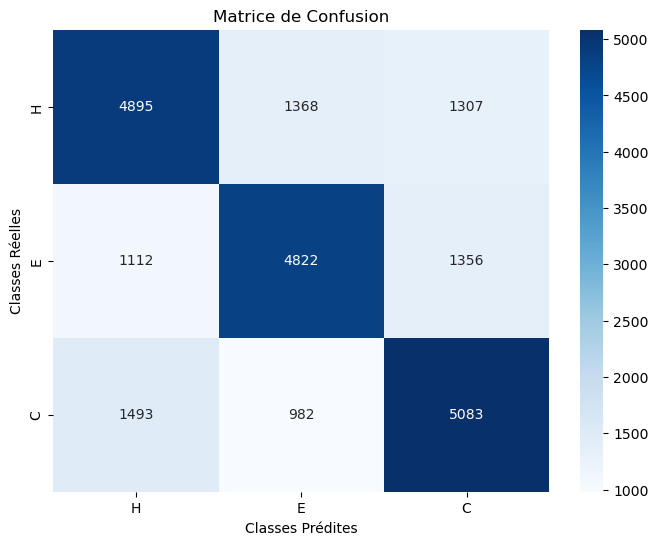

In [24]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()

In [29]:
from Exctract_features_V3 import *
pwd = "./513_distribute" 
label = {'H': 0, 'E': 1, 'C': 2}

df = create_dataset(pwd) # Depuis le script Exctract_features
display(df)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,DSSP
0,0.000000,0.153846,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,...,0.0,0.0,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.076923,2
1,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,...,0.0,0.0,0.000000,0.000000,0.000000,0.230769,0.000000,0.076923,0.076923,2
2,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,...,0.0,0.0,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.076923,2
3,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,...,0.0,0.0,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.076923,2
4,0.076923,0.076923,0.153846,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,...,0.0,0.0,0.000000,0.000000,0.076923,0.153846,0.000000,0.076923,0.076923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112081,0.153846,0.016467,0.000000,0.000000,0.060457,0.153846,0.060457,0.076923,0.076923,0.000000,...,0.0,0.0,0.000000,0.000000,0.076923,0.153846,0.000000,0.000000,0.170313,1
112082,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.002359,0.000000,0.000000,0.000000,...,0.0,0.0,0.230769,0.153846,0.153846,0.076923,0.000000,0.153846,0.151487,1
112083,0.094652,0.000000,0.076923,0.230769,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,...,0.0,0.0,0.153846,0.076923,0.000000,0.136117,0.000000,0.000000,0.000000,1
112084,0.190907,0.076923,0.000000,0.000000,0.000000,0.230769,0.039862,0.039862,0.076923,0.037061,...,0.0,0.0,0.039862,0.000000,0.076923,0.000000,0.000000,0.000000,0.037061,1


In [30]:
x = df.drop('DSSP', axis=1)
y = df['DSSP']
display(x)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.153846,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.076923
1,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.230769,0.000000,0.076923,0.076923
2,0.000000,0.076923,0.153846,0.153846,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.076923
3,0.076923,0.076923,0.153846,0.076923,0.076923,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.076923
4,0.076923,0.076923,0.153846,0.076923,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.076923,0.153846,0.000000,0.076923,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112081,0.153846,0.016467,0.000000,0.000000,0.060457,0.153846,0.060457,0.076923,0.076923,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.076923,0.153846,0.000000,0.000000,0.170313
112082,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.002359,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.230769,0.153846,0.153846,0.076923,0.000000,0.153846,0.151487
112083,0.094652,0.000000,0.076923,0.230769,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.076923,0.0,0.0,0.153846,0.076923,0.000000,0.136117,0.000000,0.000000,0.000000
112084,0.190907,0.076923,0.000000,0.000000,0.000000,0.230769,0.039862,0.039862,0.076923,0.037061,0.153846,0.0,0.0,0.039862,0.000000,0.076923,0.000000,0.000000,0.000000,0.037061


0         2
1         2
2         2
3         2
4         2
         ..
112081    1
112082    1
112083    1
112084    1
112085    1
Name: DSSP, Length: 112086, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)
display(y_train_one_hot)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [42]:
model = keras.Sequential([
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'), 
    keras.layers.Dense(256, activation='relu'), 
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(3, activation='softmax')                   
])

#3 sortit couche softmax pour avoir les proba de chaque class 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model.fit(X_train, y_train_one_hot, epochs=40, batch_size=32, validation_split=0.2)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4558 - loss: 1.0279 - val_accuracy: 0.4867 - val_loss: 1.0018
Epoch 2/50
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4943 - loss: 1.0001 - val_accuracy: 0.4959 - val_loss: 0.9909
Epoch 3/50
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5048 - loss: 0.9858 - val_accuracy: 0.5061 - val_loss: 0.9801
Epoch 4/50
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5206 - loss: 0.9610 - val_accuracy: 0.5330 - val_loss: 0.9416
Epoch 5/50
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5518 - loss: 0.9183 - val_accuracy: 0.5570 - val_loss: 0.9116
Epoch 6/50
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5915 - loss: 0.8577 - val_accuracy: 0.5749 - val_loss: 0.8877
Epoch 7/50
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6307 - loss: 0.7941 - val_accuracy: 0.6023 - val_loss: 0.8552
Epoch 8/50
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6751 - loss: 0.7225 - 

In [43]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy*100:.4f}')

701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7866 - loss: 1.0647
Loss: 1.0672, Accuracy: 78.7804


701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step


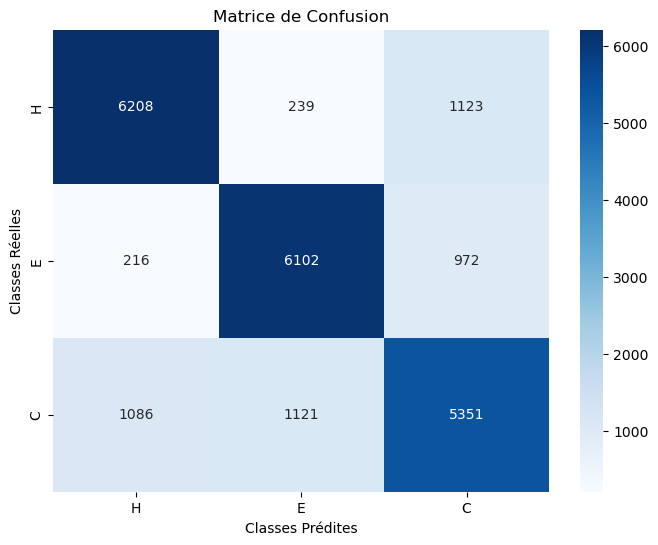

In [44]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Classes prédite avec la plus haute probabilité

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['H', 'E', 'C'], yticklabels=['H', 'E', 'C'])
plt.title('Matrice de Confusion')
plt.xlabel('Classes Prédites')
plt.ylabel('Classes Réelles')
plt.show()